In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
#Reading the CSV
df = pd.read_csv('advertising.csv')

In [3]:
#Let's take a look at it
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Text(0.5,1,'Newspaper')

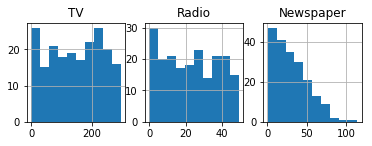

In [6]:
#Let's see the distributions
ax1=plt.subplot(2, 3, 1)
df['TV'].hist()
plt.title('TV')

ax2=plt.subplot(2, 3, 2)
df['Radio'].hist()
plt.title('Radio')

ax3=plt.subplot(2, 3, 3)
df['Newspaper'].hist()
plt.title('Newspaper')

Text(0.5,1,'Newspaper')

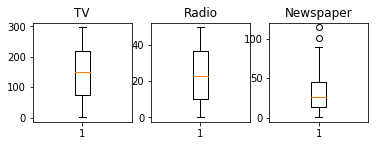

In [7]:
#Let's see the Boxplot
figure = plt.figure()
ax1=plt.subplot(2, 3, 1)
plt.boxplot(df['TV'])
plt.title('TV')

ax2=plt.subplot(2, 3, 2)
plt.boxplot(df['Radio'])
plt.title('Radio')

ax3=plt.subplot(2, 3, 3)
plt.boxplot(df['Newspaper'])
plt.title('Newspaper')

We can see that we have some Outliers in the NewsPaper DataSet, let's delete them"

In [12]:
print(df['Newspaper'].describe())

print('\nPercentile : %s' %np.percentile(df.TV, 100))


count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

Percentile : 296.4


The maximum value is 114, let's take 100 as maximum 

In [13]:
cond = df['Newspaper'] < 100

df_clean = df[cond]

Text(0.5,1,'Newspaper')

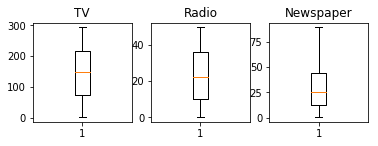

In [15]:
#Let's see the clean data's Boxplot
figure = plt.figure()
ax1=plt.subplot(2, 3, 1)
plt.boxplot(df_clean['TV'])
plt.title('TV')

ax2=plt.subplot(2, 3, 2)
plt.boxplot(df_clean['Radio'])
plt.title('Radio')

ax3=plt.subplot(2, 3, 3)
plt.boxplot(df_clean['Newspaper'])
plt.title('Newspaper')

In [16]:
#Let's analyse the correlations
print(df_clean.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.051978   0.049771  0.779121
Radio      0.051978  1.000000   0.346364  0.576748
Newspaper  0.049771  0.346364   1.000000  0.219555
Sales      0.779121  0.576748   0.219555  1.000000


TV is the most correlated with the output variable Sales.
There is No missing Value in the Data Set

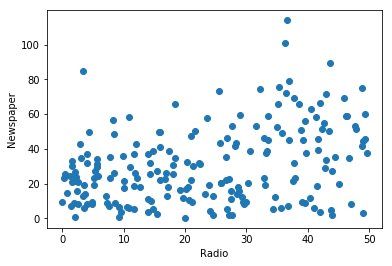

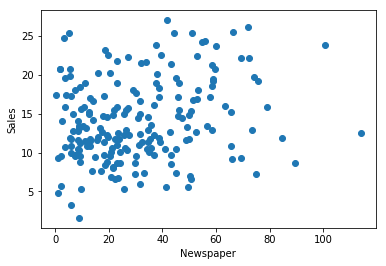

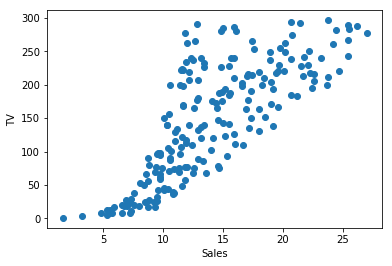

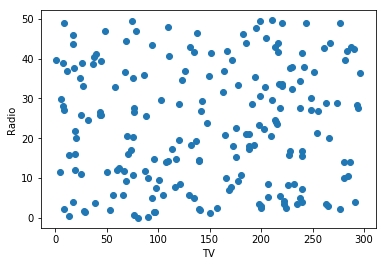

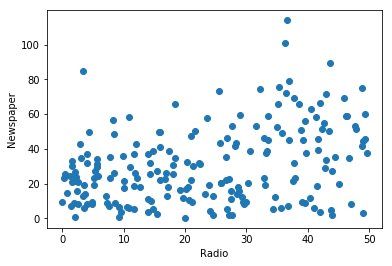

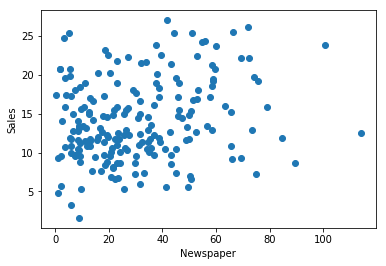

In [17]:
#Scatterplots
for i in range(-3,3):
    figure = plt.figure() 
    plt.scatter(df.iloc[:,i],df.iloc[:,i+1])
    plt.xlabel('%s' %df.columns[i])
    plt.ylabel('%s' %df.columns[i+1])

Le plot de TV et Sales est très interessant et montre la correllation entre ces deux variables.

In [18]:
#Let's take all the columns
L = df.columns
cond = L != 'Sales' #Take off 'Sales' because it's the Output
L[cond]

#Let's evaluate each model
a = 0
b = 0
c = 0
for i in L[cond]:
    lm = smf.ols(formula='Sales ~ %s ' %i, data=df).fit()
    if lm.rsquared > a: 
        a = lm.rsquared
        
    if lm.pvalues[1] > b: 
        b = lm.pvalues[1]  
        
    if lm.mse_resid > c: 
        c = lm.mse_resid
        
#Results
print('Le meilleur R^2 est %s' %a)
print('Le meilleur P-value est %s' %b)
print('Le meilleur MSE est %s' %c)

Le meilleur R^2 est 0.611875050850071
Le meilleur P-value est 0.0011481958688882314
Le meilleur MSE est 25.933356283393632


Dans le cas de la régression à une seule variable, le coffecient B a une relation inversement avec le coef B, donc plus de correlation veut dire un coef B plus petit.

In [22]:
#Let's try the Multi Linear Regression using both Radio TV and Newspaper to predicts Sales
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper ', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.58e-96
Time:                        22:55:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All variables are getting more important in the model in comparaison to when they were alone. If we increase by 50 the amount reserved to TV, sales would increase by 50*Coef(TV) = 50*0.0458.

In [23]:
#Let's delete the Newspaper variable and see what it gives. 
lm = smf.ols(formula='Sales ~ TV + Radio ', data=df).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           4.83e-98
Time:                        22:56:01   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Let's try multiplacation in our Model
df['tv_radio'] = df['TV']*df['Radio']
lm = smf.ols(formula='Sales ~ tv_radio ', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2597.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          8.78e-116
Time:                        22:57:22   Log-Likelihood:                -348.95
No. Observations:                 200   AIC:                             701.9
Df Residuals:                     198   BIC:                             708.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7993      0.142     61.921      0.000       8.519       9.080
tv_radio       0.0015   2.94e-05     50.963      0.000       0.001       0.002
==============================================================================
Omnibus:                       78.271   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.325
Skew:                          -1.601   Prob(JB):                     1.09e-57
Kurtosis:                       7.607   Cond. No.                     6.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The only interpretation is that when we do the multiplication, when giving an amount in TV and in Radio, by multiplying we will have more.